In [1]:
import numpy as np
from numpy import median
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 200

In [4]:
# read dataset into a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/cindyuj/Python-project/main/Airbnb%20.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","38,843.00","48,895.00","48,895.00"
mean,"19,017,143.24","67,620,010.65",40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,"10,983,108.39","78,610,967.03",0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,"2,539.00","2,438.00",40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,"9,471,945.00","7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,"19,677,284.00","30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,"29,152,178.50","107,434,423.00",40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,"36,487,245.00","274,321,313.00",40.91,-73.71,"10,000.00","1,250.00",629.00,58.50,327.00,365.00


In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

<AxesSubplot:>

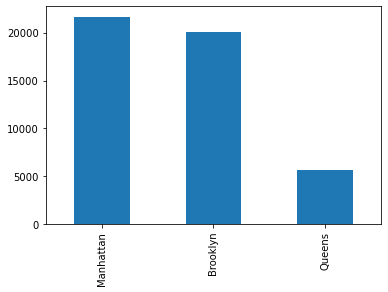

In [12]:
df['neighbourhood_group'].value_counts(sort=True).nlargest(3).plot.bar()

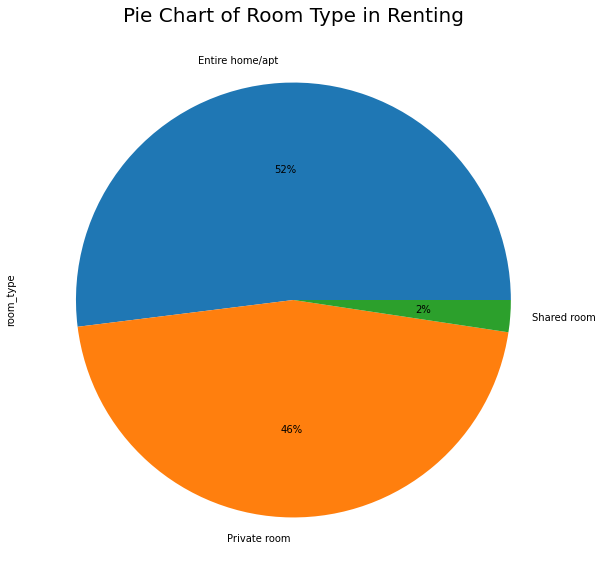

In [13]:
df['room_type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(15,10))

plt.title("Pie Chart of Room Type in Renting", size=20)

plt.show()

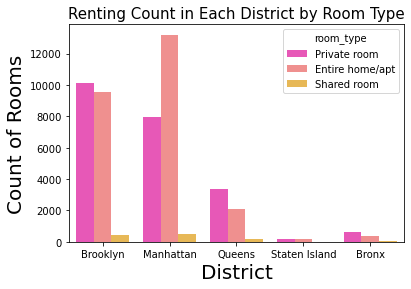

In [14]:
sns.countplot(x='neighbourhood_group', hue='room_type', data=df,  palette="spring")

plt.title('Renting Count in Each District by Room Type', size=15)
plt.ylabel('Count of Rooms', size=20)
plt.xlabel('District', size=20)

plt.show()

In [15]:
[To File Begin]

order = ['Bronx', 'Staten Island', 'Manhattan', 'Brooklyn','Queens']

fig, ax = plt.subplots(1, 2, figsize=(20,5))

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[0], hue='room_type' ,order=order)
ax[0].set_title('Renting Price in Each District by Room Type(Mean)', size=15)
ax[0].set_xlabel('Areas', size=15)
ax[0].set_ylabel('Price', size=15)

sns.barplot(data=df, y='price', x='neighbourhood_group',ax=ax[1], hue='room_type' ,order=order, estimator=median)
ax[1].set_title('Renting Price in Each District by Room Type(Median)', size=15)
ax[1].set_xlabel('Areas', size=15)
ax[1].set_ylabel("Price", size=15)


plt.show()

SyntaxError: invalid syntax (<ipython-input-15-d35e155726f2>, line 1)

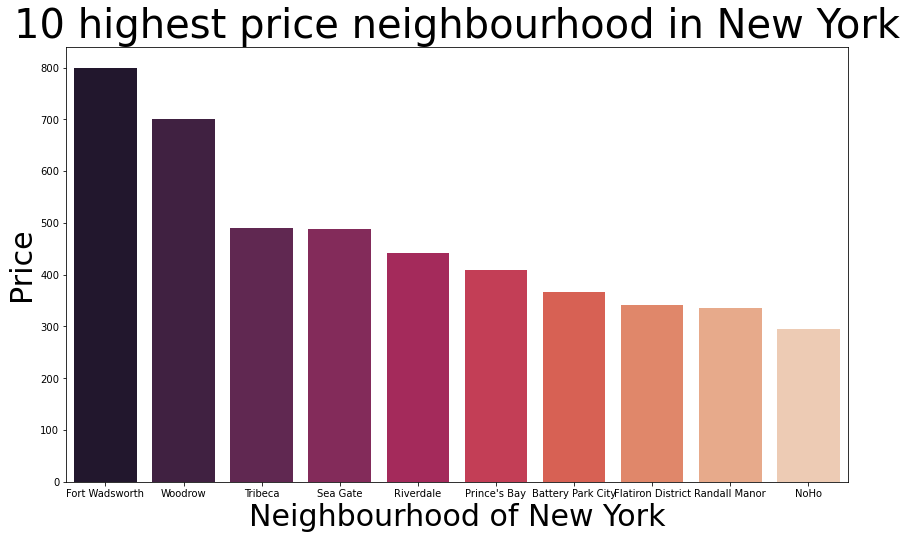

In [16]:
# The 10 highest grice neighborhood is save in variable 'high_5_price'
high_10_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

# Draw the bar chart
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=df, y=high_10_price, x=high_10_price.index, palette="rocket")

plt.title("10 highest price neighbourhood in New York", size=40)
plt.xlabel("Neighbourhood of New York", size=30)
plt.ylabel("Price", size=30)

plt.show()

In [17]:
df_manhattan = df[df['neighbourhood_group'] == "Manhattan"]
high_10_price_manhattan = df_manhattan.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
high_10_price_manhattan

neighbourhood
Tribeca             490.64
Battery Park City   367.56
Flatiron District   341.93
NoHo                295.72
SoHo                287.10
Midtown             282.72
West Village        267.68
Greenwich Village   263.41
Chelsea             249.74
Theater District    248.01
Name: price, dtype: float64

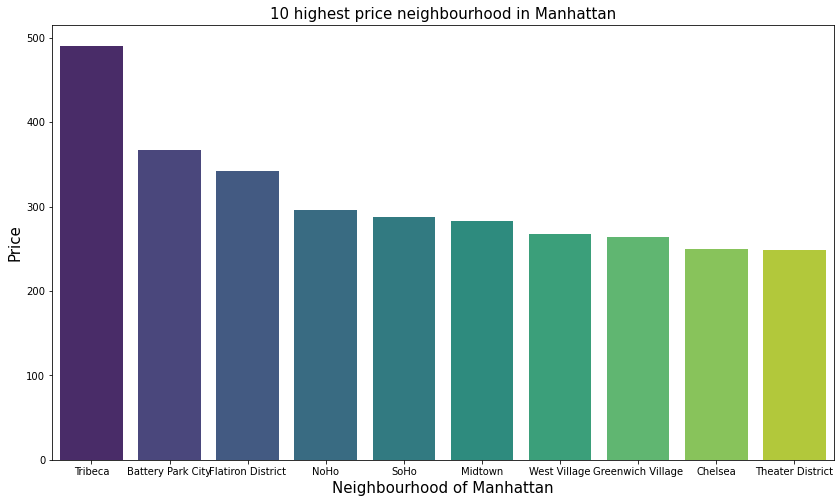

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.barplot(data=df_manhattan, y=high_10_price_manhattan, x=high_10_price_manhattan.index, palette="viridis")

plt.title("10 highest price neighbourhood in Manhattan", size=15)
plt.ylabel("Price", size=15)
plt.xlabel("Neighbourhood of Manhattan", size=15)

plt.show()